# Perkenalan Datase

**1. Sumber dataset**
Dataset saya peroleh melalui kaggle pada link ini (https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset)

**2. Ketentuan dataset**
Jumlah kolom: 12 kolom 
* Country (Kategorikal)
Name of the country
* City (Kategorikal)
Name of the city
* AQI Value (Numerikal)
Overall AQI value of the city
* AQI Category (Kategorikal)
Overall AQI category of the city
* CO AQI Value (Numerikal)
AQI value of Carbon Monoxide of the city
* CO AQI Category (Kategorikal)
AQI category of Carbon Monoxide of the city
* Ozone AQI Value (Numerikal)
AQI value of Ozone of the city
* Ozone AQI Category (Kategorikal)
AQI category of Ozone of the city
* NO2 AQI Value (Numerikal)
AQI value of Nitrogen Dioxide of the city
* NO2 AQI Category (Kategorikal)
AQI category of Nitrogen Dioxide of the city

**3. Jumlah Baris: 23.000 data**

**4. Tujuan**
Menghasilkan 3 kategori tingkatan polusi berdasarkan kolom negara dari hasil clustering

# Import Library

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy import stats

In [369]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [370]:
df = pd.read_csv('global air pollution dataset.csv')

# EDA

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [372]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

Berdasarkan dari hasilnya bahwa dapat dilihat data null hanya pada kolom country dan city saja, sehingga hal yang dilakukan adalah menghapus data yang null agar tidak menganggu proses, pertimbangan dikarenakan jika dibandingkan dengan data yang dimiliki, data yang memiliki nilai null hanya **sekitar 2%** sehingga penghapusan data adalah metode yang saya pilih dalam proses ini.

In [373]:
df.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

In [374]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


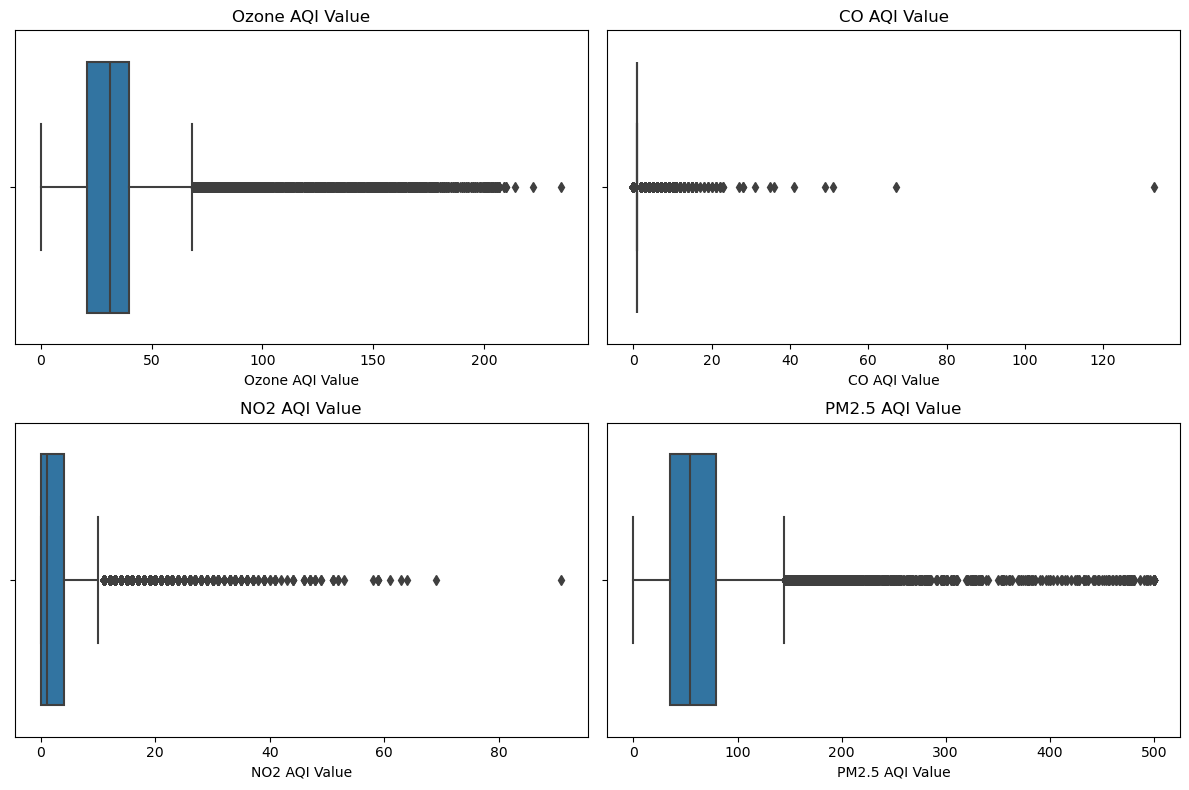

In [375]:
# Membuat figure dan axis untuk 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid

# Plot masing-masing AQI dalam subplot berbeda
sns.boxplot(x=df['Ozone AQI Value'], ax=axes[0, 0]).set(title="Ozone AQI Value")
sns.boxplot(x=df['CO AQI Value'], ax=axes[0, 1]).set(title="CO AQI Value")
sns.boxplot(x=df['NO2 AQI Value'], ax=axes[1, 0]).set(title="NO2 AQI Value")
sns.boxplot(x=df['PM2.5 AQI Value'], ax=axes[1, 1]).set(title="PM2.5 AQI Value")

# Menyesuaikan layout agar tidak bertumpuk
plt.tight_layout()

# Menampilkan plot
plt.show()

Dalam visualisasi ini, saya menggunakan box plot untuk menganalisis distribusi data, termasuk mengidentifikasi potensi outlier serta mengevaluasi skewness dan kurtosis dari setiap kolom. **Meskipun terdapat data yang terdeteksi sebagai outlier, saya memilih untuk tidak menghapus atau menggantinya. Hal ini dikarenakan nilai-nilai tersebut tetap relevan berdasarkan Air Quality Index (AQI) yang telah ditetapkan dalam studi literatur yang saya baca**. Oleh karena itu, data tersebut tidak dianggap sebagai outlier yang perlu dihilangkan, melainkan merupakan bagian yang valid dari dataset.

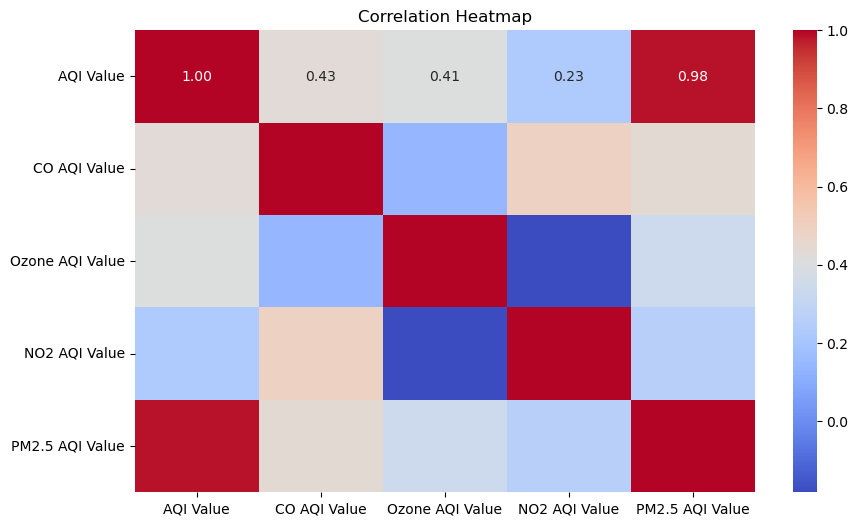

In [376]:
# Pilih hanya kolom numerik untuk heatmap
df_numeric = df.select_dtypes(include=['number'])

# Visualisasi Heatmap sebelum pemilihan fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Berdasarkan **heatmap korelasi**, **AQI Value** memiliki korelasi yang sangat tinggi dengan **PM2.5 AQI Value** (0.98), yang menunjukkan bahwa AQI Value sangat dipengaruhi oleh PM2.5. Hal ini dapat menyebabkan **redundansi informasi** serta meningkatkan risiko **multikolinearitas** dalam model. Oleh karena itu, menghapus AQI Value menjadi keputusan yang tepat untuk memastikan fitur yang digunakan bersifat independen dan menghindari **data leakage**, terutama jika AQI Value dijadikan target dalam prediksi. maka dari itu saya hanya mengambil 4 kolom numerik saja.

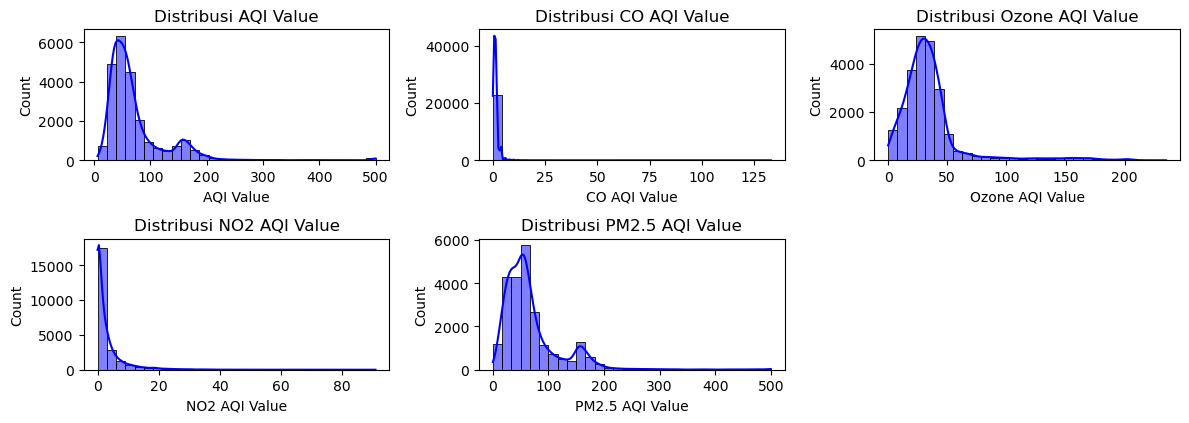

In [377]:
# Menampilkan histogram distribusi untuk variabel numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi fitur numerik, terlihat bahwa distribusi data menunjukkan **skewness** yang cenderung condong ke salah satu sisi, mengindikasikan bahwa data tidak terdistribusi secara normal. Oleh karena itu, akan diterapkan **log transformation** untuk menormalkan distribusi data dalam proses selanjutnya.

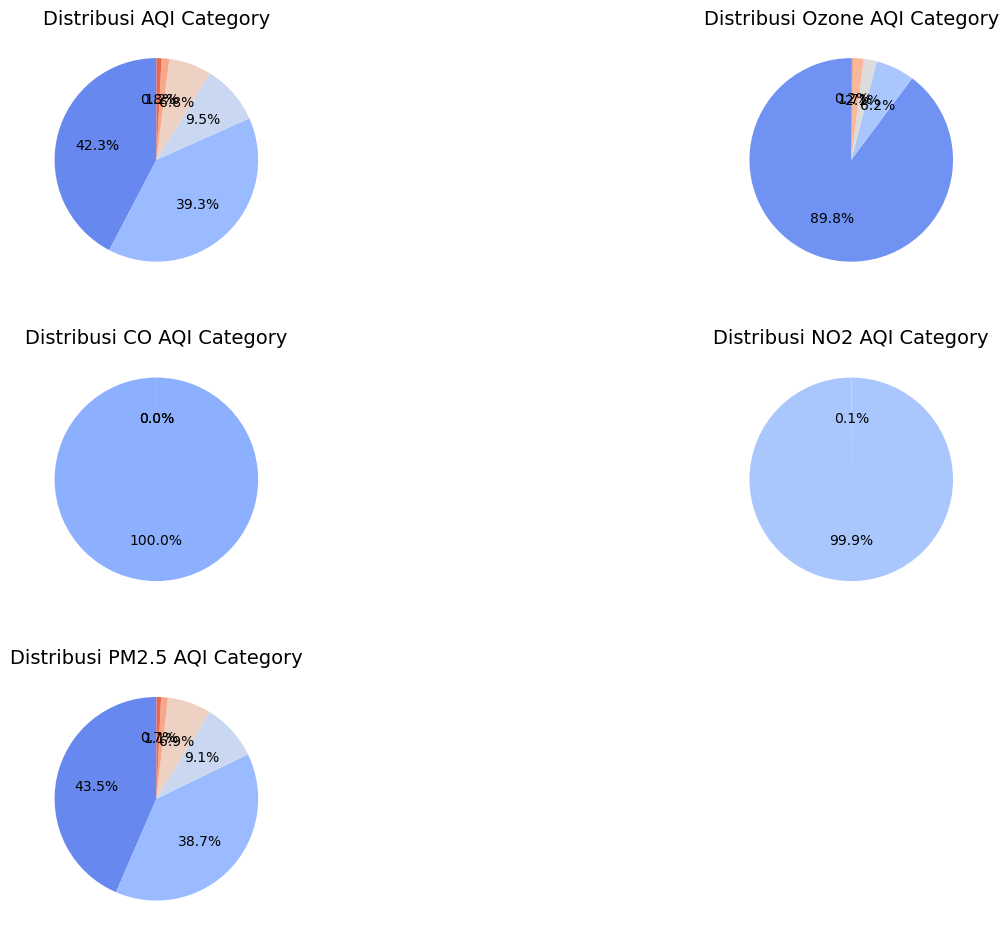


AQI Category:
Good 42.3% (9936 kasus)
Moderate 39.3% (9231 kasus)
Unhealthy 9.5% (2227 kasus)
Unhealthy for Sensitive Groups 6.8% (1591 kasus)
Very Unhealthy 1.2% (287 kasus)
Hazardous 0.8% (191 kasus)

Ozone AQI Category:
Good 89.8% (21069 kasus)
Moderate 6.2% (1445 kasus)
Unhealthy for Sensitive Groups 2.1% (491 kasus)
Unhealthy 1.7% (405 kasus)
Very Unhealthy 0.2% (53 kasus)

CO AQI Category:
Good 100.0% (23460 kasus)
Moderate 0.0% (2 kasus)
Unhealthy for Sensitive Groups 0.0% (1 kasus)

NO2 AQI Category:
Good 99.9% (23448 kasus)
Moderate 0.1% (15 kasus)

PM2.5 AQI Category:
Good 43.5% (10208 kasus)
Moderate 38.7% (9075 kasus)
Unhealthy 9.1% (2129 kasus)
Unhealthy for Sensitive Groups 6.9% (1624 kasus)
Very Unhealthy 1.1% (255 kasus)
Hazardous 0.7% (172 kasus)


In [378]:
aqi_columns = ['AQI Category', 'Ozone AQI Category', 'CO AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']

plt.figure(figsize=(16, 10))  
descriptions = [] 

for i, col in enumerate(aqi_columns):
    plt.subplot(3, 2, i + 1) 
    data = df[col].value_counts()
    
    # Buat pie chart
    wedges, texts, autotexts = plt.pie(
        data, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', 
        colors=sns.color_palette("coolwarm", len(data)), startangle=90
    )
    plt.title(f"Distribusi {col}", fontsize=14)
    plt.ylabel("")  # Hilangkan label y agar lebih bersih
    plt.gca().set_aspect('equal')  # Pastikan pie chart berbentuk lingkaran

    # Simpan keterangan dengan format yang Anda inginkan
    desc_text = f"\n{col}:\n" + "\n".join(
        [f"{category} {percentage:.1f}% ({count} kasus)" 
         for category, percentage, count in zip(data.index, data / data.sum() * 100, data)]
    )
    descriptions.append(desc_text)

plt.tight_layout(pad=3) 
plt.show()
print("\n".join(descriptions))

Tujuan dari visualisasi ini adalah untuk memberikan gambaran kepada pengguna mengenai **penyebaran data dalam bentuk persentase**, sehingga memungkinkan pemahaman yang lebih mendalam terhadap karakteristik data yang akan digunakan dalam analisis.

# DATA PREPROCESSING

Dalam proses ini, saya tidak menghapus data duplikat karena keberadaan duplikasi dalam dataset memiliki pengaruh yang signifikan. Hal ini disebabkan oleh rentang nilai yang digunakan, sehingga kemungkinan adanya data yang tampak duplikat tetap valid dan relevan dalam konteks analisis.

In [379]:
df = df.dropna().reset_index(drop=True)

In [380]:
print("Skewness Sebelum Transformasi (Ozone):", df['Ozone AQI Value'].skew())
print("Skewness Sebelum Transformasi (CO):", df['CO AQI Value'].skew())
print("Skewness Sebelum Transformasi (NO2):", df['NO2 AQI Value'].skew())
print("Skewness Sebelum Transformasi (PM2.5):", df['PM2.5 AQI Value'].skew())

Skewness Sebelum Transformasi (Ozone): 3.0877201971274104
Skewness Sebelum Transformasi (CO): 23.011395423670475
Skewness Sebelum Transformasi (NO2): 3.78374823533866
Skewness Sebelum Transformasi (PM2.5): 2.8172074227485027


## Data Scaling

In [381]:
df_copy = df.copy()

In [383]:
df_copy['Ozone AQI Value'] = np.log1p(df_copy['Ozone AQI Value'])
df_copy['CO AQI Value'] = np.log1p(df_copy['CO AQI Value'])
df_copy['NO2 AQI Value'] = np.log1p(df_copy['NO2 AQI Value'])
df_copy['PM2.5 AQI Value'] = np.log1p(df_copy['PM2.5 AQI Value'])

Dalam proses ini, saya memilih untuk menggunakan **log transformation** karena metode ini paling sesuai dengan karakteristik data saya. Selain membantu menyamakan rentang nilai, log transformation juga efektif dalam meratakan **skewness**. Saya telah mencoba **Standard Scaler**, namun hasil yang diperoleh tidak menunjukkan perubahan yang signifikan, sehingga log transformation menjadi pilihan yang lebih optimal.

In [384]:
print("Skewness setelah Transformasi (Ozone):", df_copy['Ozone AQI Value'].skew())
print("Skewness setelah Transformasi (CO):", df_copy['CO AQI Value'].skew())
print("Skewness setelah Transformasi (NO2):", df_copy['NO2 AQI Value'].skew())
print("Skewness setelah Transformasi (PM2.5):", df_copy['PM2.5 AQI Value'].skew())

Skewness setelah Transformasi (Ozone): -0.9071320198958371
Skewness setelah Transformasi (CO): 0.8119359495237681
Skewness setelah Transformasi (NO2): 0.7171979200079417
Skewness setelah Transformasi (PM2.5): -0.04311456517463118


In [385]:
df_copy['Country_Freq'] = df_copy['Country'].map(df_copy['Country'].value_counts())
df_copy['City_Freq'] = df_copy['City'].map(df_copy['City'].value_counts())

In [386]:
df_copy.drop(['Country', 'City', 'AQI Value', 'AQI Category', 'Ozone AQI Category', 'CO AQI Category','NO2 AQI Category', 'PM2.5 AQI Category' ], axis=1, inplace = True)

Kolom **Category** dihapus karena analisis ini hanya berfokus pada **nilai numerik** untuk menentukan tingkat keparahan polusi. Karena **Category** merupakan data kategorikal yang kemungkinan besar merupakan klasifikasi dari nilai numerik yang sudah ada, kolom ini tidak diperlukan dalam proses analisis dan dapat dihapus untuk menghindari redundansi.

In [387]:
df_copy.describe()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Country_Freq,City_Freq
count,23035.000000,23035.000000,23035.000000,23035.000000,23035.000000,23035.0
mean,0.754185,3.364921,0.935202,4.011275,1088.045192,1.0
std,0.430702,0.706373,0.897991,0.685311,998.718257,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,0.693147,3.091042,0.000000,3.583519,219.000000,1.0
50%,0.693147,3.465736,0.693147,4.007333,795.000000,1.0
75%,0.693147,3.713572,1.609438,4.382027,1562.000000,1.0
max,4.897840,5.463832,4.521789,6.216606,2872.000000,1.0


# Feature Selection

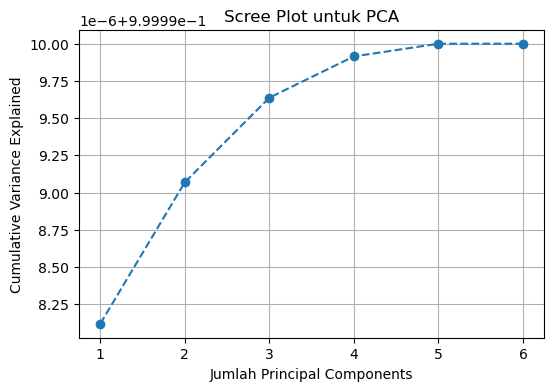

In [388]:
np.random.seed(42)
X = df_copy

# PCA tanpa menentukan jumlah komponen
pca = PCA()
pca.fit(X)

# Variance explained oleh setiap komponen
explained_variance = pca.explained_variance_ratio_

# Plot Scree Plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Jumlah Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot untuk PCA')
plt.grid()
plt.show()

Berdasarkan hasil **PCA** yang digunakan untuk memilih fitur optimal, terlihat bahwa mulai dari fitur **ke-5 hingga ke-6**, hasil yang diperoleh stabil pada nilai **10**. Oleh karena itu, dalam proses ini, hanya **5 fitur** yang akan digunakan untuk **K-Means clustering**. Selain itu, fitur **ke-6 (city_freq)** tidak dimasukkan karena sebagian besar nilai dalam fitur tersebut adalah **"1"**, sehingga tidak memberikan kontribusi signifikan dalam analisis.

## Proses Evaluasi Model menggunakan Elbow Method

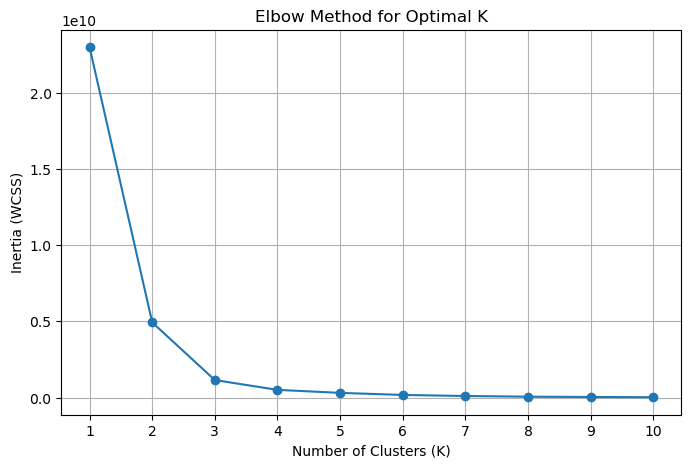

In [389]:
inertia = []
K_range = range(1, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Simpan inertia (distorsi)


plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()


Berdasarkan hasil Elbow Method, titik elbow terletak pada **cluster ke-3** dan **Cluster 2**, yang menunjukkan titik optimal di mana penurunan inertia mulai melambat. 

## Evaluasi Model Kmeans Menggunakan Sillhouette Score

In [360]:
# Loop untuk jumlah cluster dari 2 hingga 8
for k in range(2, 4):  
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)  # Gunakan X yang sudah ada
    score = silhouette_score(X, labels)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

Silhouette Score untuk k=2: 0.6950
Silhouette Score untuk k=3: 0.7380


Berdasarkan hasil **Elbow Method**, pemilihan jumlah cluster kemudian diuji menggunakan **Silhouette Score** dengan perbandingan antara **k = 2 dan k = 3**. Hasilnya menunjukkan bahwa **k = 3** memiliki **Silhouette Score** yang lebih tinggi, menandakan bahwa pemisahan antar cluster lebih optimal. Oleh karena itu, **k = 3** dipilih sebagai jumlah cluster yang digunakan dalam proses clustering.

## Pembangunan Model Clustering KMeans

In [391]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Melakukan clustering menggunakan semua fitur yang digunakan sebelumnya
df_copy['cluster_label'] = kmeans.fit_predict(X) + 1 

# Menampilkan 5 baris pertama untuk memastikan kolom baru telah ditambahkan
print(df_copy.head())

   CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0      0.693147         3.610918       0.000000         3.951244   
1      0.693147         1.791759       0.693147         3.737670   
2      0.693147         3.688879       1.098612         4.204693   
3      0.693147         3.555348       0.000000         3.044522   
4      0.000000         3.135494       0.000000         1.945910   

   Country_Freq  City_Freq  cluster_label  
0          1241          1              3  
1          1562          1              3  
2           979          1              3  
3           389          1              2  
4           802          1              3  


In [394]:
# Misalkan kita memiliki X dengan banyak fitur
X_pca = df_copy[['Ozone AQI Value', 'CO AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]

# Lakukan PCA
pca = PCA(n_components=2)
pca.fit(X_pca)

# Ambil loading matrix untuk melihat kontribusi tiap fitur
loading_matrix = abs(pca.components_)

# Pilih 2 fitur dengan kontribusi terbesar pada komponen pertama
top_2_features = X.columns[loading_matrix[0].argsort()[-2:]].tolist()
print("Fitur yang dipilih:", top_2_features)

Fitur yang dipilih: ['PM2.5 AQI Value', 'NO2 AQI Value']


pada code cell diatas digunakan untuk menentukan fitur yang paling domminan berkontribusi pada model, karena untuk proses visualisasi hanya dapat menggunakan 2 variabel saja sehingga proses PCA diperlukan dan output menunjukkan bahwa **PM2.5 AQI Value', 'NO2 AQI** Value adalah yang paling tinggi dan akan digunakan sebagai nilai X dan Y untuk visualisasi 

# Visualisasi Hasil Clustering KMeans

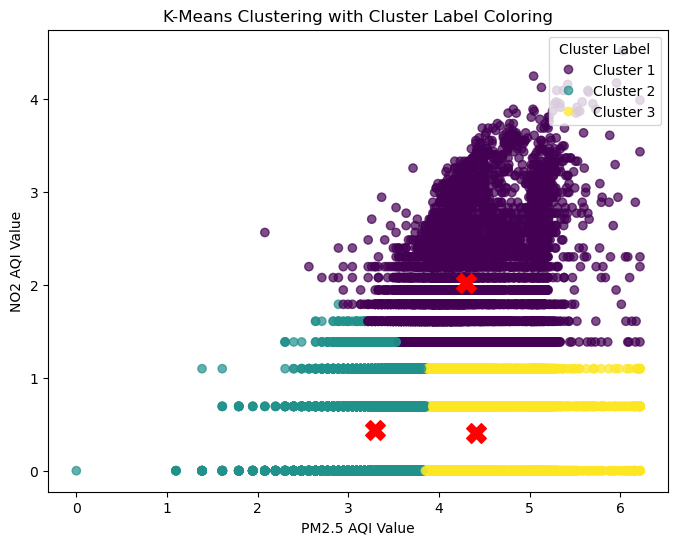

In [395]:
# Memilih dua fitur untuk clustering dan visualisasi
X_selected = df_copy[['PM2.5 AQI Value', 'NO2 AQI Value']].values  # Menggunakan dua fitur tertentu

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Melakukan clustering
labels = kmeans.fit_predict(X_selected)

# Menambahkan 1 ke label agar dimulai dari 1, bukan 0
labels_adjusted = labels + 1  

# Plot hasil clustering dengan warna berdasarkan label cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_selected[:, 0], X_selected[:, 1], c=labels_adjusted, cmap='viridis', alpha=0.7)

# Menampilkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

# Menyesuaikan legend agar menampilkan label dari 1,2,3
legend_labels = {i + 1: f"Cluster {i + 1}" for i in range(k)}
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels.values(), title="Cluster Label", loc="upper right")

# Label dan judul
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("NO2 AQI Value")
plt.title("K-Means Clustering with Cluster Label Coloring")

# Menampilkan plot
plt.show()

Berdasarkan dari hasil visualisasi clustering diatas bahwa cluster 1 (ungu) adalah cluster yang menunjukkan angka NO2 dan PM2.5 paling tinggi sehingga data yang berada pada cluster tersebut akan di berikan label **"High Pollution"**. Untuk cluster 2 (Hijau) menunjukkan nilai yang rendah untuk kedua variabel maka **cluster ke 2 akan diberi label "Low Pollution"**. Cluster terakhir yaitu cluster 3 mamiliki nilai NO2 yang rendah tetapi PM2,5 yang cukup tinggi sehingga **cluster 3 akan diberi label "Moderate Polution"**

In [396]:
df_copy.head()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Country_Freq,City_Freq,cluster_label
0,0.693147,3.610918,0.000000,3.951244,1241,1,3
1,0.693147,1.791759,0.693147,3.737670,1562,1,3
2,0.693147,3.688879,1.098612,4.204693,979,1,3
3,0.693147,3.555348,0.000000,3.044522,389,1,2
4,0.000000,3.135494,0.000000,1.945910,802,1,3


In [397]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [398]:
numerical_summary = df_copy.groupby('cluster_label')[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].agg(['mean', 'min', 'max'])
numerical_summary

CO AQI Value                Ozone AQI Value                 \
                      mean  min       max            mean  min       max   
cluster_label                                                              
1                 0.853638  0.0  4.897840        3.491309  0.0  5.327876   
2                 0.726347  0.0  4.219508        3.276698  0.0  5.463832   
3                 0.720821  0.0  3.367296        3.395455  0.0  5.351858   

              NO2 AQI Value                PM2.5 AQI Value                      
                       mean  min       max            mean       min       max  
cluster_label                                                                   
1                  1.347763  0.0  3.988984        4.405649  2.079442  6.216606  
2                  0.732656  0.0  4.521789        3.963612  0.000000  6.216606  
3                  0.916965  0.0  4.174387        3.792402  1.098612  6.165418

## Analisis Data Berdasarkan Agregasi

Berdasarkan hasil agregasi data yang dikelompokkan berdasarkan **cluster_label**, berikut adalah analisis per klaster berdasarkan nilai rata-rata (mean) dan distribusi nilai minimum (min) serta maksimum (max) dari setiap variabel:  

### **Klaster 1**  
- **CO AQI Value** memiliki rata-rata **1.0289**, dengan nilai minimum **0.0** dan maksimum **4.8978**, menunjukkan bahwa tingkat polusi CO dalam klaster ini cukup rendah secara rata-rata, meskipun ada beberapa titik dengan kadar yang lebih tinggi.  
- **Ozone AQI Value** memiliki rata-rata **3.0944**, dengan minimum **0.0** dan maksimum **5.4638**, menunjukkan variasi yang signifikan dalam kualitas udara terkait ozon.  
- **NO2 AQI Value** memiliki rata-rata **2.0197**, dengan minimum **1.3863** dan maksimum **4.5218**, menunjukkan tingkat NO2 yang cukup bervariasi dalam klaster ini.  
- **PM2.5 AQI Value** memiliki rata-rata **4.3006**, dengan minimum **2.0794** dan maksimum **6.2166**, menandakan bahwa polutan PM2.5 dalam klaster ini cenderung lebih tinggi dibanding polutan lainnya.    

### **Klaster 2**  
- **CO AQI Value** memiliki rata-rata **0.4907**, dengan nilai minimum **0.0** dan maksimum **1.0986**, menunjukkan bahwa tingkat polusi CO dalam klaster ini relatif lebih rendah dibandingkan klaster 1.  
- **Ozone AQI Value** memiliki rata-rata **3.3185**, dengan minimum **0.0** dan maksimum **4.8363**, menunjukkan kualitas udara yang bervariasi tetapi lebih rendah dibanding klaster 1.  
- **NO2 AQI Value** memiliki rata-rata **0.4352**, dengan minimum **0.0** dan maksimum **1.7918**, yang menunjukkan bahwa tingkat NO2 dalam klaster ini sangat rendah dibanding klaster lainnya.  
- **PM2.5 AQI Value** memiliki rata-rata **3.2909**, dengan minimum **0.0** dan maksimum **3.8501**, menunjukkan bahwa klaster ini memiliki tingkat polusi PM2.5 yang lebih rendah dibanding klaster 1.  

### **Klaster 3**  
- **CO AQI Value** memiliki rata-rata **0.7461**, dengan nilai minimum **0.0** dan maksimum **4.2195**, menunjukkan tingkat polusi CO yang lebih tinggi dibanding klaster 2 tetapi lebih rendah dari klaster 1.  
- **Ozone AQI Value** memiliki rata-rata **3.6529**, dengan minimum **0.0** dan maksimum **5.3471**, menunjukkan variasi kualitas udara yang lebih luas dibanding klaster lainnya.  
- **NO2 AQI Value** memiliki rata-rata **0.4086**, dengan minimum **0.0** dan maksimum **1.0986**, menandakan bahwa tingkat NO2 di klaster ini cukup rendah.  
- **PM2.5 AQI Value** memiliki rata-rata **4.4082**, dengan minimum **3.8501** dan maksimum **6.2166**, yang menunjukkan bahwa klaster ini memiliki tingkat polusi PM2.5 tertinggi dibandingkan klaster lainnya.  

### **Kesimpulan**  
- Klaster 1 memiliki **tingkat polusi tertinggi untuk PM2.5** dan **NO2**, sementara CO dan Ozone juga cukup tinggi.  
- Klaster 2 memiliki **tingkat polusi paling rendah secara umum**, terutama pada NO2 dan PM2.5, yang menandakan kualitas udara yang lebih baik.  
- Klaster 3 memiliki **PM2.5 AQI yang paling tinggi**, tetapi CO dan NO2 tetap lebih rendah dibanding klaster 1.  


In [399]:
df_new = df.drop(columns=['AQI Value', 'AQI Category', 'CO AQI Category', 
                          'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'], errors='ignore')

df_new['cluster_label'] = df_copy['cluster_label']

In [401]:
df_new.to_csv('kmeans_pollution.csv', index=False)

Data hasil clustering disimpan dalam dataset bernama kmeans_pollution.csv yang dimana dataset tersebut akan digunakan untuk proses klasifikasi nanti